In [17]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import OneHotEncoder
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
pd.read_csv('Data/links.csv')

,movieId,imdbId,tmdbId
0,1,114709,862.0
1,2,113497,8844.0
2,3,113228,15602.0
3,4,114885,31357.0
4,5,113041,11862.0
...,...,...,...
9737,193581,5476944,432131.0
9738,193583,5914996,445030.0
9739,193585,6397426,479308.0
9740,193587,8391976,483455.0


In [3]:
movies = pd.read_csv('Data/movies.csv')
movies.head()

,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy


In [4]:
ratings = pd.read_csv('Data/ratings.csv')
ratings.head()

,userId,movieId,rating,timestamp
0,1,1,4.0,964982703
1,1,3,4.0,964981247
2,1,6,4.0,964982224
3,1,47,5.0,964983815
4,1,50,5.0,964982931


In [5]:
tags = pd.read_csv('Data/tags.csv')
tags[tags.movieId==1]

,userId,movieId,tag,timestamp
629,336,1,pixar,1139045764
981,474,1,pixar,1137206825
2886,567,1,fun,1525286013


### Merge movies.csv, ratings.csv, tags.csv

In [6]:
movies_ratings = movies.merge(ratings, how='outer', on = 'movieId')
movies_ratings

,movieId,title,genres,userId,rating,timestamp
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,1.0,4.0,9.649827e+08
1,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,5.0,4.0,8.474350e+08
2,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,7.0,4.5,1.106636e+09
3,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,15.0,2.5,1.510578e+09
4,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,17.0,4.5,1.305696e+09
...,...,...,...,...,...,...
100849,193581,Black Butler: Book of the Atlantic (2017),Action|Animation|Comedy|Fantasy,184.0,4.0,1.537109e+09
100850,193583,No Game No Life: Zero (2017),Animation|Comedy|Fantasy,184.0,3.5,1.537110e+09
100851,193585,Flint (2017),Drama,184.0,3.5,1.537110e+09
100852,193587,Bungo Stray Dogs: Dead Apple (2018),Action|Animation,184.0,3.5,1.537110e+09


In [7]:
df = movies_ratings.merge(tags, how='outer', on = ['movieId', 'userId'] )
#df.dropna(inplace=True)
df

,movieId,title,genres,userId,rating,timestamp_x,tag,timestamp_y
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,1.0,4.0,9.649827e+08,NaN,NaN
1,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,5.0,4.0,8.474350e+08,NaN,NaN
2,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,7.0,4.5,1.106636e+09,NaN,NaN
3,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,15.0,2.5,1.510578e+09,NaN,NaN
4,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,17.0,4.5,1.305696e+09,NaN,NaN
...,...,...,...,...,...,...,...,...
102897,6016,NaN,NaN,573.0,NaN,NaN,not seen,1.186589e+09
102898,6157,NaN,NaN,573.0,NaN,NaN,bad,1.186589e+09
102899,6157,NaN,NaN,573.0,NaN,NaN,Ben Affleck,1.186589e+09
102900,273,NaN,NaN,600.0,NaN,NaN,gothic,1.237739e+09


In [8]:
df = movies_ratings.merge(tags, how='left', on = ['movieId', 'userId'] )
#df.dropna(inplace=True)
df


,movieId,title,genres,userId,rating,timestamp_x,tag,timestamp_y
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,1.0,4.0,9.649827e+08,NaN,NaN
1,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,5.0,4.0,8.474350e+08,NaN,NaN
2,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,7.0,4.5,1.106636e+09,NaN,NaN
3,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,15.0,2.5,1.510578e+09,NaN,NaN
4,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,17.0,4.5,1.305696e+09,NaN,NaN
...,...,...,...,...,...,...,...,...
102690,193581,Black Butler: Book of the Atlantic (2017),Action|Animation|Comedy|Fantasy,184.0,4.0,1.537109e+09,NaN,NaN
102691,193583,No Game No Life: Zero (2017),Animation|Comedy|Fantasy,184.0,3.5,1.537110e+09,NaN,NaN
102692,193585,Flint (2017),Drama,184.0,3.5,1.537110e+09,NaN,NaN
102693,193587,Bungo Stray Dogs: Dead Apple (2018),Action|Animation,184.0,3.5,1.537110e+09,NaN,NaN


In [9]:
df['genres'].value_counts()

Comedy                                                      7251
Drama                                                       6406
Comedy|Romance                                              4002
Comedy|Drama|Romance                                        3040
Drama|Romance                                               2881
                                                            ... 
Action|Adventure|Fantasy|War                                   1
Action|Adventure|Romance|Sci-Fi                                1
Action|Comedy|Drama|War                                        1
Action|Adventure|Animation|Comedy|Fantasy|Mystery|Sci-Fi       1
Comedy|Crime|Horror|Mystery|Thriller                           1
Name: genres, Length: 951, dtype: int64

## Genre Ohe

In [10]:
genres=[]
for i in range(len(df.genres)):
    for x in df.genres[i].split('|'):
        if x not in genres:
            genres.append(x)  

len(genres)
for x in genres:
    df[x] = 0
for i in range(len(df.genres)):
    for x in df.genres[i].split('|'):
        df[x][i]=1
df

<ipython-input-10-50b9abf6240f>:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[x][i]=1


,movieId,title,genres,userId,rating,timestamp_x,tag,timestamp_y,Adventure,Animation,...,Horror,Mystery,Sci-Fi,War,Musical,Documentary,IMAX,Western,Film-Noir,(no genres listed)
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,1.0,4.0,9.649827e+08,NaN,NaN,1,1,...,0,0,0,0,0,0,0,0,0,0
1,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,5.0,4.0,8.474350e+08,NaN,NaN,1,1,...,0,0,0,0,0,0,0,0,0,0
2,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,7.0,4.5,1.106636e+09,NaN,NaN,1,1,...,0,0,0,0,0,0,0,0,0,0
3,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,15.0,2.5,1.510578e+09,NaN,NaN,1,1,...,0,0,0,0,0,0,0,0,0,0
4,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,17.0,4.5,1.305696e+09,NaN,NaN,1,1,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
102690,193581,Black Butler: Book of the Atlantic (2017),Action|Animation|Comedy|Fantasy,184.0,4.0,1.537109e+09,NaN,NaN,0,1,...,0,0,0,0,0,0,0,0,0,0
102691,193583,No Game No Life: Zero (2017),Animation|Comedy|Fantasy,184.0,3.5,1.537110e+09,NaN,NaN,0,1,...,0,0,0,0,0,0,0,0,0,0
102692,193585,Flint (2017),Drama,184.0,3.5,1.537110e+09,NaN,NaN,0,0,...,0,0,0,0,0,0,0,0,0,0
102693,193587,Bungo Stray Dogs: Dead Apple (2018),Action|Animation,184.0,3.5,1.537110e+09,NaN,NaN,0,1,...,0,0,0,0,0,0,0,0,0,0


In [11]:
df.drop(columns='genres',inplace=True)
df.sort_index(inplace=True)

In [12]:
df

,movieId,title,userId,rating,timestamp_x,tag,timestamp_y,Adventure,Animation,Children,...,Horror,Mystery,Sci-Fi,War,Musical,Documentary,IMAX,Western,Film-Noir,(no genres listed)
0,1,Toy Story (1995),1.0,4.0,9.649827e+08,NaN,NaN,1,1,1,...,0,0,0,0,0,0,0,0,0,0
1,1,Toy Story (1995),5.0,4.0,8.474350e+08,NaN,NaN,1,1,1,...,0,0,0,0,0,0,0,0,0,0
2,1,Toy Story (1995),7.0,4.5,1.106636e+09,NaN,NaN,1,1,1,...,0,0,0,0,0,0,0,0,0,0
3,1,Toy Story (1995),15.0,2.5,1.510578e+09,NaN,NaN,1,1,1,...,0,0,0,0,0,0,0,0,0,0
4,1,Toy Story (1995),17.0,4.5,1.305696e+09,NaN,NaN,1,1,1,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
102690,193581,Black Butler: Book of the Atlantic (2017),184.0,4.0,1.537109e+09,NaN,NaN,0,1,0,...,0,0,0,0,0,0,0,0,0,0
102691,193583,No Game No Life: Zero (2017),184.0,3.5,1.537110e+09,NaN,NaN,0,1,0,...,0,0,0,0,0,0,0,0,0,0
102692,193585,Flint (2017),184.0,3.5,1.537110e+09,NaN,NaN,0,0,0,...,0,0,0,0,0,0,0,0,0,0
102693,193587,Bungo Stray Dogs: Dead Apple (2018),184.0,3.5,1.537110e+09,NaN,NaN,0,1,0,...,0,0,0,0,0,0,0,0,0,0


Animation    				7120
Children    				9285
Comedy    				39625
Fantasy    				11990
Romance    				18358
Drama    				43036
Action    				31151
Crime    				17227
Thriller    				27180
Horror    				7409
Mystery    				7906
Sci-Fi    				17691
War    				4932
Musical    				4171
Documentary    				1261
IMAX    				4258
Western    				1966
Film-Noir    				882
(no genres listed)    				49


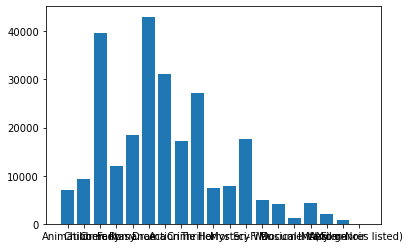

In [25]:
x={}
for i in df.columns[8:28]:
    x[i]=df[i].value_counts()[1]
    print("{}    \t\t\t\t{}".format(i,x[i]))

plt.bar(height=x.values(),x=x.keys())
plt.show()

/Users/deja/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


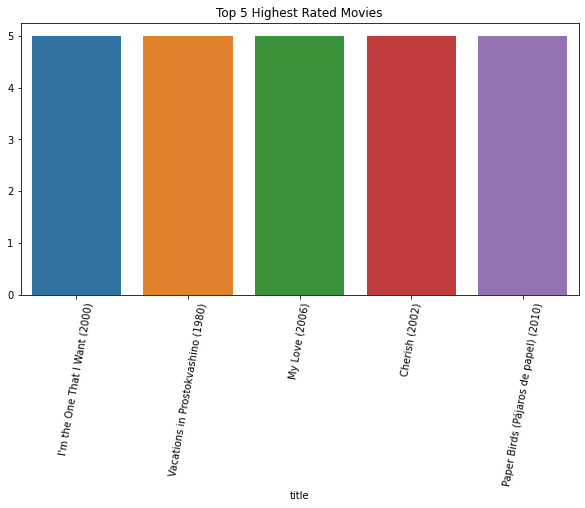

In [20]:
plt.figure(figsize=(10,5))
topmovies = df.groupby('title').mean()['rating'].sort_values(ascending=False).head(5)
sns.barplot(topmovies.index, topmovies.values)
plt.title('Top 5 Highest Rated Movies')
plt.xticks(rotation=80);

In [26]:
# extracting the 'year' from the title
df.title = df.title.str.strip()
df['year'] = df.title.str[-5:-1]
df.head()

,movieId,title,userId,rating,timestamp_x,tag,timestamp_y,Adventure,Animation,Children,...,Mystery,Sci-Fi,War,Musical,Documentary,IMAX,Western,Film-Noir,(no genres listed),year
0,1,Toy Story (1995),1.0,4.0,9.649827e+08,NaN,NaN,1,1,1,...,0,0,0,0,0,0,0,0,0,1995
1,1,Toy Story (1995),5.0,4.0,8.474350e+08,NaN,NaN,1,1,1,...,0,0,0,0,0,0,0,0,0,1995
2,1,Toy Story (1995),7.0,4.5,1.106636e+09,NaN,NaN,1,1,1,...,0,0,0,0,0,0,0,0,0,1995
3,1,Toy Story (1995),15.0,2.5,1.510578e+09,NaN,NaN,1,1,1,...,0,0,0,0,0,0,0,0,0,1995
4,1,Toy Story (1995),17.0,4.5,1.305696e+09,NaN,NaN,1,1,1,...,0,0,0,0,0,0,0,0,0,1995


In [27]:
df.year.unique()

array(['1995', '1994', '1996', '1976', '1992', '1967', '1993', '1964',
       '1977', '1965', '1982', '1990', '1991', '1989', '1937', '1940',
       '1969', '1981', '1973', '1970', '1955', '1959', '1968', '1988',
       '1997', '1972', '1943', '1952', '1951', '1957', '1961', '1958',
       '1954', '1934', '1944', '1960', '1963', '1942', '1941', '1953',
       '1939', '1950', '1946', '1945', '1938', '1947', '1935', '1936',
       '1956', '1949', '1932', '1975', '1974', '1971', '1979', '1987',
       '1986', '1980', '1978', '1985', '1966', '1962', '1983', '1984',
       '1948', '1933', '1931', '1922', '1998', '1929', '1930', '1927',
       '1928', '1999', '2000', '1926', '1919', '1921', '1925', '1923',
       '2001', '2002', '2003', '1920', '1915', '1924', '2004', '1916',
       '1917', '2005', '2006', '1902', 'lon ', '1903', '2007', '2008',
       '2009', '2010', '2011', '2012', '2013', '2014', '2015', '2016',
       '2017', '2018', '1908', 'r On', ' Roa', 'atso', 'imal', 'erso',
      

In [28]:
# replace year mannually 
# report the title and search year on internet  
df[df.year=='lon '] # title 'Babylon 5' 1993? 
df[df.year=='r On'] # title 'Ready Player One'  2018
df[df.year==' Roa'] # title 'Hyena Road'   2015
df[df.year=='atso'] # title 'The Adventures of Sherlock Holmes and Doctor W..'  1980
df[df.year=='imal'] # title 'Nocturnal Animals'  2016
df[df.year=='erso'] # title 'Paterson'  2016
df[df.year=='ligh'] # title 'Moonlight'  2016
df[df.year=='he O'] # title 'The OA'  2016
df[df.year=='osmo'] # title 'Cosmos' 2014
df[df.year==' Bab'] # title 'Maria Bamford: Old Baby' 2017
df[df.year=='ron '] # title 'Generation Iron 2' 2017
df[df.year=='irro'] # title 'Black Mirror' 2011

,movieId,title,userId,rating,timestamp_x,tag,timestamp_y,Adventure,Animation,Children,...,Mystery,Sci-Fi,War,Musical,Documentary,IMAX,Western,Film-Noir,(no genres listed),year
102446,176601,Black Mirror,62.0,5.0,1.525795e+09,NaN,NaN,0,0,0,...,0,0,0,0,0,0,0,0,1,irro


In [29]:
df.replace({'year' : { 'lon ':1993, 'r On':2018, ' Roa':2015, 'atso':1980, 
                      'imal':2016, 'erso':2016, 'ligh':2016, 'he O':2016,
                     'osmo':2014, ' Bab':2017, 'ron ':2017,'irro':2011 }}, inplace=True)

df.year = df.year.astype(int)

In [30]:
df.year.unique()

array([1995, 1994, 1996, 1976, 1992, 1967, 1993, 1964, 1977, 1965, 1982,
       1990, 1991, 1989, 1937, 1940, 1969, 1981, 1973, 1970, 1955, 1959,
       1968, 1988, 1997, 1972, 1943, 1952, 1951, 1957, 1961, 1958, 1954,
       1934, 1944, 1960, 1963, 1942, 1941, 1953, 1939, 1950, 1946, 1945,
       1938, 1947, 1935, 1936, 1956, 1949, 1932, 1975, 1974, 1971, 1979,
       1987, 1986, 1980, 1978, 1985, 1966, 1962, 1983, 1984, 1948, 1933,
       1931, 1922, 1998, 1929, 1930, 1927, 1928, 1999, 2000, 1926, 1919,
       1921, 1925, 1923, 2001, 2002, 2003, 1920, 1915, 1924, 2004, 1916,
       1917, 2005, 2006, 1902, 1903, 2007, 2008, 2009, 2010, 2011, 2012,
       2013, 2014, 2015, 2016, 2017, 2018, 1908])

In [31]:
# from IMDB database, we include IMDB rating, number of votes

# imdb Rating and number of votes 
imdb_rating = pd.read_csv('Data/title.ratings.tsv',sep='\t')

# Use links.csv to link imdb and movielens database 
links = pd.read_csv('Data/links.csv')


In [32]:

# change the imdb movie ID to numeric and remove the first two characters to match imdbId in links

imdb_rating['imdbId'] = imdb_rating.tconst.str[2:]
imdb_rating.imdbId = imdb_rating.imdbId.astype(int) 
imdb_rating.rename(columns={"averageRating": "imdb_rating", "numVotes": "imdb_nvotes"}, inplace=True)
imdb_rating.drop('tconst', axis=1, inplace=True)
imdb_rating.drop_duplicates(inplace=True)
imdb_rating.head()

,imdb_rating,imdb_nvotes,imdbId
0,5.7,1846,1
1,6.0,237,2
2,6.5,1611,3
3,6.1,154,4
4,6.2,2434,5


In [33]:
# merge IMDB rating to links using imdbId 
imdb = imdb_rating.merge(links, how = 'left', on = 'imdbId')
imdb.drop(['tmdbId', 'imdbId'], axis=1, inplace=True) 
imdb.dropna(inplace=True)

In [34]:
# merge to df file using movieId

df = df.merge(imdb, how = 'left', on = 'movieId')



In [35]:
df.head()

,movieId,title,userId,rating,timestamp_x,tag,timestamp_y,Adventure,Animation,Children,...,War,Musical,Documentary,IMAX,Western,Film-Noir,(no genres listed),year,imdb_rating,imdb_nvotes
0,1,Toy Story (1995),1.0,4.0,9.649827e+08,NaN,NaN,1,1,1,...,0,0,0,0,0,0,0,1995,8.3,941511.0
1,1,Toy Story (1995),5.0,4.0,8.474350e+08,NaN,NaN,1,1,1,...,0,0,0,0,0,0,0,1995,8.3,941511.0
2,1,Toy Story (1995),7.0,4.5,1.106636e+09,NaN,NaN,1,1,1,...,0,0,0,0,0,0,0,1995,8.3,941511.0
3,1,Toy Story (1995),15.0,2.5,1.510578e+09,NaN,NaN,1,1,1,...,0,0,0,0,0,0,0,1995,8.3,941511.0
4,1,Toy Story (1995),17.0,4.5,1.305696e+09,NaN,NaN,1,1,1,...,0,0,0,0,0,0,0,1995,8.3,941511.0


In [ ]:
# so on a scale of 0 to 5, with 0 min and 5 max, see Lawrence's movie ratings below
Lawrence_movie_ratings = [
            {'title':'Predator', 'rating':4.9},
            {'title':'Final Destination', 'rating':4.9},
            {'title':'Mission Impossible', 'rating':4},
            {'title':"Beverly Hills Cop", 'rating':3},
            {'title':'Exorcist, The', 'rating':4.8},
            {'title':'Waiting to Exhale', 'rating':3.9},
            {'title':'Avengers, The', 'rating':4.5},
            {'title':'Omen, The', 'rating':5.0}
         ] 
Lawrence_movie_ratings = pd.DataFrame(Lawrence_movie_ratings)
Lawrence_movie_ratings